In [27]:
import jax

jax.config.update("jax_enable_x64", True)
import jaxoplanet.experimental.starry as jerry

In [31]:
import numpy as np

planet = [0.9, -0.5]

inc = 0.8
obl = 0.5
theta = 0.2
theta_z = -np.pi / 2 + np.arctan2(planet[1], planet[0])

np.random.seed(0)
y = jerry.ylm.Ylm.from_dense(np.hstack([1.0, np.random.rand(10) * 1e-1]))

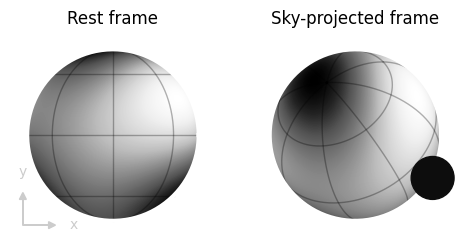

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2.5))


def format(ax):
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)


ax = plt.subplot(121)
s = jerry.maps.Map(y=y)
jerry.visualization.show_map(s, ax=ax, cmap="Greys_r", n=4)
format(ax)
plt.title("Rest frame")

x = 1.05
h = 0.08
l = 0.3
plt.arrow(-x, -x, 0.0, l, head_width=h, head_length=h, color="0.8")
plt.arrow(-x, -x, l, 0.0, head_width=h, head_length=h, color="0.8")

letter = dict(fontsize=10, color="0.8")
plt.text(-x + 1.8 * l, -x, "x", ha="left", va="center", **letter)
plt.text(-x, -x + 1.8 * l, "y", ha="center", va="bottom", **letter)

ax = plt.subplot(122)
s = jerry.maps.Map(y=y, inc=np.pi / 2 - inc, obl=obl)
jerry.visualization.show_map(s, ax=ax, cmap="Greys_r", n=4, theta=theta)
disk = plt.Circle(planet, 0.25, color="0.05", zorder=10)
ax.add_artist(disk)
plt.title("Sky-projected frame")
format(ax)

plt.tight_layout()
plt.savefig("figures/rotation_basis.pdf")

In [33]:
from scipy.spatial.transform import Rotation
import numpy as np

lines = jerry.utils.lon_lat_lines()


def rotate_lines(lines, u, angle=0.0):
    u = np.asarray(u)
    R = Rotation.from_rotvec(u * angle)
    lat, lon = lines
    rotated_lat = np.array([R.apply(l.T) for l in lat]).T
    rotated_lat = np.swapaxes(rotated_lat.T, -1, 1)
    rotated_lon = np.array([R.apply(l.T) for l in lon]).T
    rotated_lon = np.swapaxes(rotated_lon.T, -1, 1)
    return rotated_lat, rotated_lon


def plot_lines(lines, ax, pts: int = 100, **kwargs):
    kwargs.setdefault("c", kwargs.pop("color", "0.8"))
    kwargs.setdefault("lw", kwargs.pop("linewidth", 1))
    kwargs.setdefault("alpha", 1.0)

    jerry.utils.plot_lines(lines[0], ax=ax, **kwargs)
    jerry.utils.plot_lines(lines[1], ax=ax, **kwargs)
    theta = np.linspace(0, 2 * np.pi, 2 * pts)
    plt.plot(np.cos(theta), np.sin(theta), **kwargs)

In [34]:
pi2 = "\pi/2"

rotations = (
    ([1.0, 0.0, 0.0], 0.5 * np.pi, f"${pi2}$"),
    ([0.0, 0.0, 1.0], theta, r"$\{\theta\}$"),
    ([1.0, 0.0, 0.0], -0.5 * np.pi, f"$-{pi2}$"),
    ([0.0, 0.0, 1.0], obl, "$obl$"),
    ([-np.cos(obl), -np.sin(obl), 0.0], -inc, "$inc - \pi/2$"),
    ([0, 0, 1.0], -theta_z, r"$\{\theta_z\}$"),
    ([0, 0, 1.0], -theta_z, "$\\theta_z$"),
)

In [35]:
def plot_vector(u, l=0.3, c="k"):
    u_ = np.asarray(u)
    if u_[0] == 0.0 and u_[1] == 0.0:
        plt.plot(0.0, 0.0, "o", color=c, ms=3.0)
    else:
        new_u = u_ / np.linalg.norm(u_)
        new_u[2] = 0.0
        new_u /= np.linalg.norm(new_u)
        plt.arrow(
            new_u[0],
            new_u[1],
            (l) * new_u[0],
            (l) * new_u[1],
            head_width=0.1,
            head_length=0.1,
            color=c,
        )

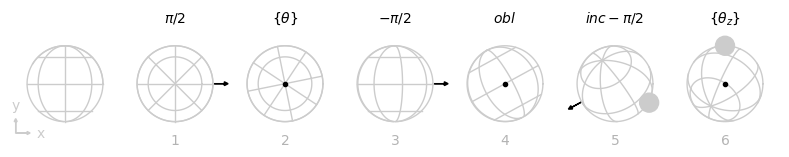

In [36]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

lines = jerry.utils.lon_lat_lines(n=4)
lines = rotate_lines(lines, [1.0, 0.0, 0.0], -np.pi / 2)

plt.figure(figsize=(8, 2))
axes = GridSpec(1, len(rotations), wspace=0.0, hspace=0.0)
ax = plt.subplot(axes[0])


for i, (u, angle, text) in enumerate(rotations):

    special = i in [2, 6]

    # plt.plot([0.0, 0.0], [-1.0, 1.0], color="0.8", lw=0.5, zorder=0)
    # plt.axhline(0, color="0.8", lw=0.5, zorder=0)
    ax = plt.subplot(axes[i])
    plot_lines(
        lines,
        ax,
    )
    lines = rotate_lines(lines, u, angle)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_xlim(-1.45, 1.45)
    ax.set_ylim(-1.45, 1.45)

    x = 1.3

    if i != 0:
        text = rotations[i - 1][2]
        u = rotations[i - 1][0]
        ax.text(
            0.5,
            1.1,
            text,
            transform=ax.transAxes,
            ha="center",
            va="center",
            fontsize=10,
        )
        plot_vector(u)
        plt.text(-0, -x, f"{i}", fontsize=10, color="0.7", va="top", ha="center")

    else:
        h = 0.08
        l = 0.3
        plt.arrow(-x, -x, 0.0, l, head_width=h, head_length=h, color="0.8")
        plt.arrow(-x, -x, l, 0.0, head_width=h, head_length=h, color="0.8")

        letter = dict(fontsize=10, color="0.8")
        plt.text(-x + 1.8 * l, -x, "x", ha="left", va="center", **letter)
        plt.text(-x, -x + 1.8 * l, "y", ha="center", va="bottom", **letter)

    if i == len(rotations) - 2:
        # add disk
        disk = plt.Circle(planet, 0.25, color="0.8")
        ax.add_artist(disk)
    if i == len(rotations) - 1:
        disk = plt.Circle((0, 1), 0.25, color="0.8")
        ax.add_artist(disk)

plt.tight_layout()
plt.savefig("figures/rotation_starry.pdf")

In [37]:
def axis_angle(inc, obl):
    co = np.cos(obl / 2)
    so = np.sin(obl / 2)
    ci = np.cos(inc / 2)
    si = np.sin(inc / 2)

    denominator = np.sqrt(1 - (ci**2) * (co**2))

    axis_x = si * co / denominator
    axis_y = si * so / denominator
    axis_z = -ci * so / denominator

    angle = 2 * np.arccos(ci * co)

    axis = np.array([axis_x, axis_y, axis_z])
    norm = np.linalg.norm(axis)
    axis = axis / norm
    angle *= norm

    return axis, angle

In [38]:
axis_angle(inc, obl)

(array([ 0.83625852,  0.21353186, -0.50505033]), 0.9361987770018992)

In [39]:
v, angle = axis_angle(inc, obl)

rotations = (
    ([1.0, 0.0, 0.0], 0.5 * np.pi, f"${pi2}$"),
    ([0.0, 0.0, 1.0], theta, r"$\{\theta\}$"),
    (-v, angle, f"$\omega$"),
    ([0, 0, 1.0], -theta_z, r"$\{\theta_z\}$"),
    ([0, 0, 1.0], -theta_z, "$\\theta_z$"),
)

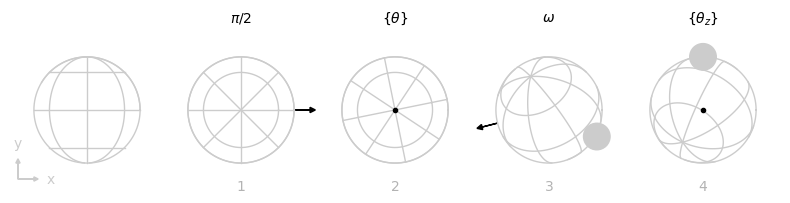

In [40]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

lines = jerry.utils.lon_lat_lines(n=4)
lines = rotate_lines(lines, [1.0, 0.0, 0.0], -np.pi / 2)

plt.figure(figsize=(8, 2))
axes = GridSpec(1, len(rotations), wspace=0.0, hspace=0.0)
ax = plt.subplot(axes[0])


for i, (u, angle, text) in enumerate(rotations):

    # plt.plot([0.0, 0.0], [-1.0, 1.0], color="0.8", lw=0.5, zorder=0)
    # plt.axhline(0, color="0.8", lw=0.5, zorder=0)
    ax = plt.subplot(axes[i])
    plot_lines(lines, ax)
    lines = rotate_lines(lines, u, angle)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_xlim(-1.45, 1.45)
    ax.set_ylim(-1.45, 1.45)

    if i != 0:
        text = rotations[i - 1][2]
        u = rotations[i - 1][0]
        ax.text(
            0.5,
            1.1,
            text,
            transform=ax.transAxes,
            ha="center",
            va="center",
            fontsize=10,
        )
        plot_vector(u)
        plt.text(-0, -x, f"{i}", fontsize=10, color="0.7", va="top", ha="center")

    else:
        x = 1.3
        h = 0.08
        l = 0.3
        plt.arrow(-x, -x, 0.0, l, head_width=h, head_length=h, color="0.8")
        plt.arrow(-x, -x, l, 0.0, head_width=h, head_length=h, color="0.8")

        letter = dict(fontsize=10, color="0.8")
        plt.text(-x + 1.8 * l, -x, "x", ha="left", va="center", **letter)
        plt.text(-x, -x + 1.8 * l, "y", ha="center", va="bottom", **letter)

    if i == len(rotations) - 2:
        # add disk
        disk = plt.Circle(planet, 0.25, color="0.8")
        ax.add_artist(disk)
    if i == len(rotations) - 1:
        disk = plt.Circle((0, 1), 0.25, color="0.8")
        ax.add_artist(disk)

plt.tight_layout()
plt.savefig("figures/rotation_jaxoplanet_1.pdf")

In [41]:
y = jerry.ylm.Ylm.from_dense(np.hstack([1.0, np.random.rand(10) * 1e-1]))

In [13]:
from jaxoplanet.experimental.starry.rotation import dot_rotation_matrix
import jax.numpy as jnp


# new one
def left_project_new(ydeg, inc, obl, theta, x):
    x = dot_rotation_matrix(ydeg, 1.0, None, None, -0.5 * jnp.pi)(x)
    x = dot_rotation_matrix(ydeg, None, None, 1.0, -theta)(x)

    co = jnp.cos(obl / 2)
    so = jnp.sin(obl / 2)
    ci = jnp.cos(inc / 2)
    si = jnp.sin(inc / 2)

    denominator = jnp.sqrt(1 - ci**2 * co**2)

    axis_x = si * co
    axis_y = si * so
    axis_z = -so * ci

    angle = 2 * jnp.arccos(ci * co)

    arg = jnp.linalg.norm(jnp.array([axis_x, axis_y, axis_z]))
    axis_x = jnp.where(arg > 0, axis_x / denominator, 1.0)
    axis_y = jnp.where(arg > 0, axis_y / denominator, 0.0)
    axis_z = jnp.where(arg > 0, axis_z / denominator, 0.0)

    x = dot_rotation_matrix(ydeg, axis_x, axis_y, axis_z, angle)(x)
    return x

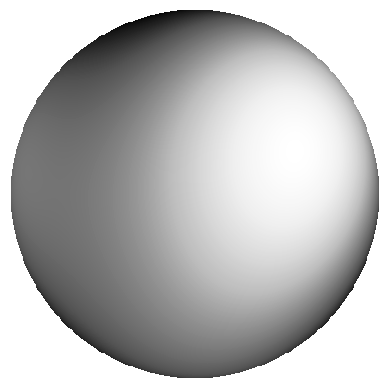

In [15]:
jerry.visualization.show_map(
    jerry.ylm.Ylm.from_dense(
        left_project_new(y.ell_max, np.pi / 2 - inc, obl, 0.0, y.todense())
    ),
    cmap="Greys_r",
)